In [7]:
import torch, os, sys
from pathlib import Path
from tqdm import tqdm
import matplotlib.pyplot as plt

src_dir = os.path.abspath(os.path.join(os.getcwd(), Path(Path.home(), "projects", "ddpm_coarse", "coarse_code", "src")))
sys.path.append(src_dir)
from sampling_utils import get_coarse_length, get_coarse_interaction, pdb_to_all_coords_tensor 
from pdb_parsing import coarse_graph_maker

In [3]:
ori_path = Path(Path.home(), "projects", "ddpm", "data", "refined_peplen_8-18_interaction50")
oris = os.listdir(ori_path)
samples_path = Path(Path.home(), "projects", "ddpm_coarse", "data", "8-18_x0pdl_samples")
samples = os.listdir(samples_path)
print("original PDB path : ", ori_path)
print("sample PDB path   : ", samples_path)

original PDB path :  /home/jsi0613/projects/ddpm/data/refined_peplen_8-18_interaction50
sample PDB path   :  /home/jsi0613/projects/ddpm_coarse/data/8-18_x0pdl_samples


In [19]:
CACA_length_ori, CACA_length_x0, CACB_length_ori, CACB_length_x0, minCA_length_ori, minCA_length_x0, num_interaction_ori, num_interaction_x0 = [],[],[],[],[],[],[],[]

for pdb in tqdm(samples[:100]): 
    
    ori_pdb = str(ori_path) + '/' + pdb 
    ori_G,_ = coarse_graph_maker(ori_pdb).make_graph3(25.0)
    ori = ori_G.node_xyz 
    pepidx = ori_G.pepidx.to(ori.device)
    ori = ori - ori[pepidx].mean(dim=0)

    sample_pdb = str(samples_path) + '/' + pdb 
    x_t1 = pdb_to_all_coords_tensor(sample_pdb)
    x_t1 = x_t1 - x_t1.mean(dim=0)
    x0 = ori.clone()
    x0[pepidx] = x_t1.to(ori.device)

    CACAori, CACBori = get_coarse_length(ori[pepidx])
    CACAx0, CACBx0 = get_coarse_length(x0[pepidx])
    ori_interaction, minCA_ori = get_coarse_interaction(ori, pepidx)
    x0_interaction, minCA_x0 = get_coarse_interaction(x0, pepidx)

    CACAori_mean = CACAori.mean()
    CACAori_var = CACAori.var() 
    CACBori_mean = CACBori.mean()
    CACBori_var = CACBori.var() 

    CACAx0_mean = CACAx0.mean()
    CACAx0_var = CACAx0.var() 
    CACBx0_mean = CACBx0.mean()
    CACBx0_var = CACBx0.var()

    CACA_length_ori.append(CACAori_mean.item())
    CACA_length_x0.append(CACAx0_mean.item())
    
    CACB_length_ori.append(CACBori_mean.item()) 
    CACB_length_x0.append(CACBx0_mean.item())

    minCA_length_ori.append(minCA_ori.item())
    minCA_length_x0.append(minCA_x0.item())

    num_interaction_ori.append(ori_interaction)
    num_interaction_x0.append(x0_interaction)



100%|██████████| 100/100 [00:21<00:00,  4.67it/s]


/tmp/ipykernel_344177/2732894126.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([CACA_length_ori, CACA_length_x0], labels=["original", "samples"])


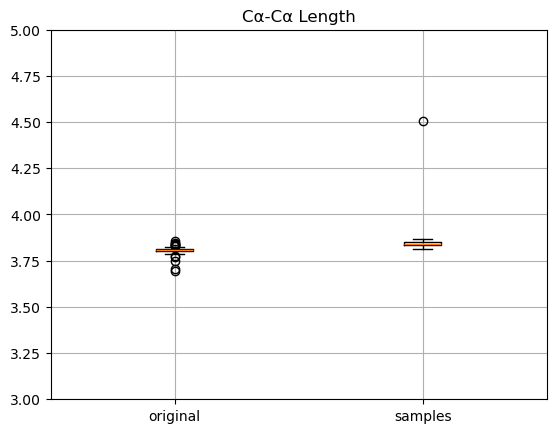

In [20]:
plt.boxplot([CACA_length_ori, CACA_length_x0], labels=["original", "samples"])
plt.ylim(3, 5)
plt.title("Cα-Cα Length")
plt.grid(True)
plt.show()

/tmp/ipykernel_344177/1417721268.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([CACB_length_ori, CACB_length_x0], labels=["original", "samples"])


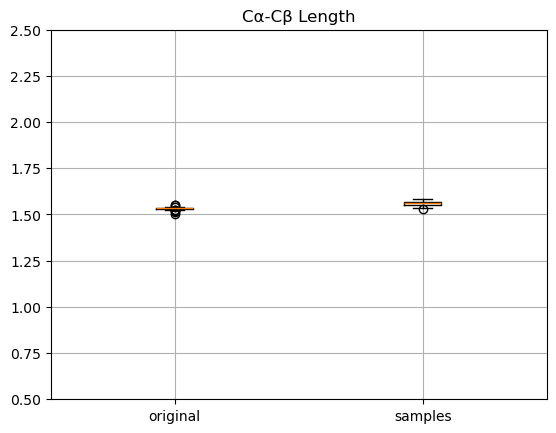

In [22]:
plt.boxplot([CACB_length_ori, CACB_length_x0], labels=["original", "samples"])
plt.ylim(0.5, 2.5)
plt.title("Cα-Cβ Length")
plt.grid(True)
plt.show()

/tmp/ipykernel_344177/438742658.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([minCA_length_ori, minCA_length_x0], labels=["original", "samples"])


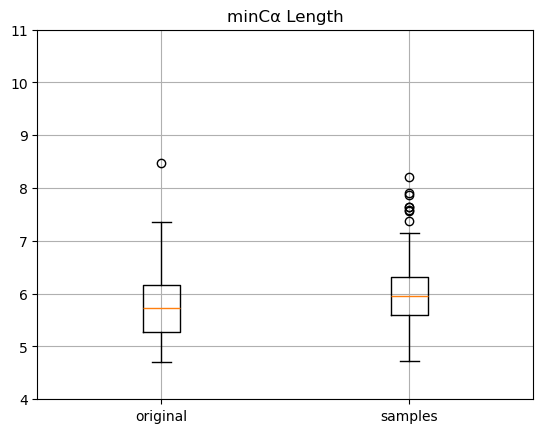

In [24]:
plt.boxplot([minCA_length_ori, minCA_length_x0], labels=["original", "samples"])
plt.ylim(4, 11)
plt.title("minCα Length")
plt.grid(True)
plt.show()

/tmp/ipykernel_344177/3840954316.py:1: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot([num_interaction_ori, num_interaction_x0], labels=["original", "samples"])


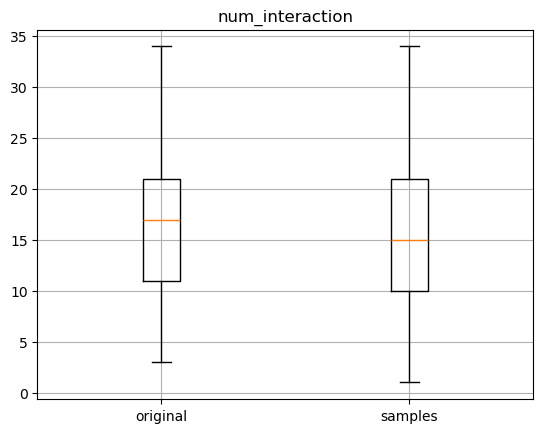

In [ ]:
plt.boxplot([num_interaction_ori, num_interaction_x0], labels=["original", "samples"])
# plt.ylim(4, 11)
plt.title("number of interaction")
plt.grid(True)
plt.show()